### Business Understanding
The Lending Club Platform is a platform that allows individuals to loan other individuals.Not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate.As a data scientist in this platform I have been tasked with the duty of comming up with a predictive model that solves the issue to avoid loosing funds or loosing customers.

**The problem** that led to this project is that the traditional creditworthiness assesments such as:credit history,limited data scope and human judgment can be limited ,leading to loan defaulters and financial losses for lenders. This situation can limit access to credit for some borrowers and lead to inefficiencies for lenders. A more accurate and inclusive method of assessing creditworthiness is needed to improve the lending process for both sides.

This project proposes a **solution** that leverages the power of machine learning to move beyond the limitations of traditional creditworthiness assessments. Its benefits include:More accurate predictions of loan repayment behavior,potentially identify creditworthy borrowers who might be overlooked by traditional methods and automate some aspects of the credit assessment process.

> **Problem statement:** the aim of this project is to build a model that predicts if LendingClub loans will be paid back or defaulted. We'll use LendingClub's data on borrowers, loans, and repayment history to find factors affecting repayment. By applying machine learning, we want to create an accurate model to help financial institutions assess creditworthiness, improve risk management, and make better lending decisions.
#### objectives
1. Develop and train the machine learning model.
2. Validate the model's accuracy and reliability.
3. Integrate the model into LendingClub's

### Data Understanding
we will be using the LendingClub dataset which is available on Kaggle.The data has a data frame with 10,000 observations on the following 55 variables.
	LoanStatNew	Description
0. loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
1. term:The number of payments on the loan. Values are in months and can be either 36 or 60.
2. int_rate: Interest Rate on the loan
3. installment:The monthly payment owed by the borrower if the loan originates.
4. grade:LC assigned loan grade
5. sub_grade:LC assigned loan subgrade
6. emp_title:The job title supplied by the Borrower when applying for the loan.*
7. emp_length:Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8. home_ownership:The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are:RENT, OWN, MORTGAGE, OTHER
9. annual_inc:The self-reported annual income provided by the borrower during registration.
10. verification_status:Indicates if income was verified by LC, not verified, or if the income source was verified
11. issue_d:The month which the loan was funded
12. loan_status:Current status of the loan
13. purpose:A category provided by the borrower for the loan request.
14. title:The loan title provided by the borrower
15. zip_code:The first 3 numbers of the zip code provided by the borrower in the loan application.
16. addr_state:The state provided by the borrower in the loan application
17. dti:A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
18. earliest_cr_line:The month the borrower's earliest reported credit line was opened
19. open_acc:The number of open credit lines in the borrower's credit file.

> our target variable is *loan_status*

### Load data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
import import_ipynb
import functions
from sklearn.utils import resample

importing Jupyter notebook from functions.ipynb


In [2]:
# Path to the data file
data_path = 'data/loans_full_schema.csv'

# Load the data using the load_data function from the imported notebook
data = functions.load_data(data_path)
data

Head:
   Unnamed: 0                emp_title  emp_length state homeownership  \
0           1  global config engineer          3.0    NJ      MORTGAGE   
1           2   warehouse office clerk        10.0    HI          RENT   
2           3                 assembly         3.0    WI          RENT   
3           4         customer service         1.0    PA          RENT   
4           5     security supervisor         10.0    CA          RENT   

   annual_income  verified_income  debt_to_income  annual_income_joint  \
0        90000.0         Verified           18.01                  NaN   
1        40000.0     Not Verified            5.04                  NaN   
2        40000.0  Source Verified           21.15                  NaN   
3        30000.0     Not Verified           10.16                  NaN   
4        35000.0         Verified           57.96              57000.0   

  verification_income_joint  ...  sub_grade  issue_month  loan_status  \
0                       NaN  ..

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,2,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,4,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,5,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,9997,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,9998,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,9999,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


Let us deal with the missing values.

In [3]:
# Check for null values in the entire DataFrame
null_values = data.isnull().sum()

# Print the columns with their corresponding number of null values
print(null_values)

# Optionally, filter and display only columns with null values
null_columns = null_values[null_values > 0]
print( )
print("Columns with null values:")
print(null_columns.shape)
print( )

# Check for null values in percentage
null_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of null values in each column:")
print(null_percentage)


Unnamed: 0                             0
emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installm

###### Drop unneccesary columns
lets drop the unnamed column as it is similar to the index column

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.sample(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
1572,butcher assistant,6.0,MO,OWN,23000.0,Source Verified,23.12,NaN,NaN,NaN,...,A5,Feb-2018,Current,fractional,DirectPay,3601.11,497.66,398.89,98.77,0.0
5940,operatot,10.0,NY,MORTGAGE,230000.0,Source Verified,14.59,NaN,NaN,NaN,...,C2,Jan-2018,Late (16-30 days),whole,Cash,15236.35,1463.52,763.65,699.87,0.0
9774,maitnence supervisor,8.0,MO,OWN,30000.0,Source Verified,9.52,NaN,NaN,NaN,...,A2,Mar-2018,Current,whole,Cash,13851.40,1365.37,1148.60,216.77,0.0
1721,it specialist,7.0,MD,RENT,116365.0,Not Verified,9.42,NaN,NaN,NaN,...,A1,Mar-2018,Current,whole,Cash,11071.21,1080.45,928.79,151.66,0.0
2463,NaN,NaN,FL,MORTGAGE,30000.0,Not Verified,32.52,NaN,NaN,NaN,...,A4,Feb-2018,Current,whole,Cash,1618.95,221.97,181.05,40.92,0.0


**Note** that there are 10 columns with  nullvalues these are:emp_title, emp_length, debt_to_income, annual_income_joint, verification_income_joint, debt_to_income_joint, months_since_last_delinq, months_since_90d_late, months_since_last_credit_inquiry,num_accounts_120d_past_due  . 
we handle missing values in different ways: for empirical data we using the median or max value ensures we don't skew the data distribution, and for logical data,for columns where missing data might logically mean 'none' or 'not applicable', we use 0 or 'Not Verified'.

In [5]:
# Handling missing values
data['emp_title'].fillna('Unknown', inplace=True)
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)
data['annual_income_joint'].fillna(0, inplace=True)
data['verification_income_joint'].fillna('Not Verified', inplace=True)
data['debt_to_income'].fillna(data['debt_to_income'].median(), inplace=True)
data['debt_to_income_joint'].fillna(0, inplace=True)
data['months_since_last_delinq'].fillna(0, inplace=True)
data['months_since_90d_late'].fillna(0, inplace=True)
data['months_since_last_credit_inquiry'].fillna(data['months_since_last_credit_inquiry'].max(), inplace=True)
data['num_accounts_120d_past_due'].fillna(0, inplace=True)

# Verify that there are no null values left in these columns
print("Null values after handling:\n", data.isnull().sum())

Null values after handling:
 emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_cre

In [6]:
data.shape

(10000, 55)

No data has been dropped so the shape of the data  is maintained and all null values eliminated.

### Handle categorical data
Machine learning algorithms only understand numbers hence the need to encode our categorical data.We will do this using OneHotEncoder.Our categorical data is in columns:emp_title,state,homeownership,verified_income,verification_income_joint,sub_grade,issue_month	loan_status	initial_listing_status	disbursement_method among many others.

In [7]:
data.sample(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
509,assistant general manager,1.0,NY,RENT,43000.0,Verified,19.15,0.0,Not Verified,0.0,...,D5,Feb-2018,Current,whole,Cash,33643.67,3781.29,1356.33,2424.96,0.0
5233,foreman,0.0,AZ,MORTGAGE,37000.0,Verified,17.32,0.0,Not Verified,0.0,...,B4,Jan-2018,Current,whole,Cash,3519.22,651.53,480.78,170.75,0.0
6136,senior loan officer,5.0,CA,MORTGAGE,130000.0,Not Verified,15.02,0.0,Not Verified,0.0,...,C4,Jan-2018,Current,whole,Cash,19786.11,2465.58,1213.89,1251.69,0.0
3226,nurse case manager,2.0,OH,RENT,65488.0,Verified,18.46,0.0,Not Verified,0.0,...,C4,Mar-2018,Current,whole,Cash,13990.61,1535.77,1009.39,526.38,0.0
2291,supervisor,8.0,FL,MORTGAGE,110000.0,Source Verified,23.49,0.0,Not Verified,0.0,...,D5,Feb-2018,Current,whole,Cash,19224.93,2160.77,775.07,1385.70,0.0


In [8]:
# One-hot encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Convert boolean columns to integers
data_encoded = data_encoded.astype(int)

data_encoded.head()

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'verification_income_joint', 'loan_purpose', 'application_type',
       'grade', 'sub_grade', 'issue_month', 'loan_status',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')


,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade_G4,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_whole,disbursement_method_DirectPay
0,3,90000,18,0,0,0,38,2001,6,28,...,0,0,1,1,0,0,0,0,1,0
1,10,40000,5,0,0,0,0,1996,1,30,...,0,0,0,1,0,0,0,0,1,0
2,3,40000,21,0,0,0,28,2006,4,31,...,0,0,0,1,0,0,0,0,0,0
3,1,30000,10,0,0,0,0,2007,0,4,...,0,1,0,1,0,0,0,0,1,0
4,10,35000,57,57000,37,0,0,2008,7,22,...,0,0,1,1,0,0,0,0,1,0


##### Feature scaling
This is essential for algorithms that calculate distance between data such as:*KNN*. 

**Standardizing numerical variables** ensures they have a mean of 0 and a standard deviation of 1 which helps many machine learning algorithms perform better.

In [9]:
import numpy as np
# Standardize numerical variables
# Find numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
print(numerical_columns)
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Merge scaled numerical and encoded categorical features
data_final = pd.concat([scaled_numerical_df.reset_index(drop=True), data_encoded.reset_index(drop=True)], axis=1)
data_final.head()

Index(['emp_length', 'annual_income', 'debt_to_income', 'annual_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', '

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade_G4,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_whole,disbursement_method_DirectPay
0,-0.827259,0.166502,-0.086347,-0.360365,-0.384177,-0.315962,0.952651,-0.037203,1.698227,0.447663,...,0,0,1,1,0,0,0,0,1,0
1,1.145088,-0.605925,-0.951802,-0.360365,-0.384177,-0.315962,-0.689962,-0.678630,-0.402603,0.615944,...,0,0,0,1,0,0,0,0,1,0
2,-0.827259,-0.605925,0.123178,-0.360365,-0.384177,-0.315962,0.520384,0.604224,0.857895,0.700085,...,0,0,0,1,0,0,0,0,0,0
3,-1.390787,-0.760410,-0.610158,-0.360365,-0.384177,-0.315962,-0.689962,0.732510,-0.822769,-1.571716,...,0,1,0,1,0,0,0,0,1,0
4,1.145088,-0.683167,2.579417,0.713764,4.459670,-0.315962,-0.689962,0.860795,2.118393,-0.057182,...,0,0,1,1,0,0,0,0,1,0


#### Store feature matrix (X) and target (y)
Our target matrix is loan_status we are focusing on the sub categories : fully_paid and defaulted as our prediction aims to show if the loan is likely to be paid or to be defaulted.
1. Check the subcategories in loan status.
2. Create a binary variable with 'Fully_paid' as 1 and 'defaulted' as 0.
3. plot a bar graph displaying value counts of the 'loan_status_binary'

Defines the target variable ('loan_status') which indicates whether a loan was fully paid or defaulted. Creates a binary target variable ('loan_status_binary') where 'Fully Paid' is mapped to 1 and 'Defaulted' is mapped to 0. Optionally filters out loans with a status of 'Current' (if you only want to focus on fully paid vs. defaulted). Calculates the class imbalance by counting the occurrences of each class in the binary target variable. Visualizes the class imbalance using a bar chart with seaborn (sns.barplot).

In [13]:
# Define the target variable
#target = 'loan_status'

# Create a binary target variable
data_final['loan_status_binary'] = data_final ['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Optionally, filter out 'Current' loans
data_filtered = data_final [data_final['loan_status'] != 'Current']

# Count the number of fully paid and defaulted loans
loan_status_counts = data_filtered['loan_status_binary'].value_counts().reset_index()
loan_status_counts.columns = ['loan_status', 'count']
loan_status_counts['loan_status'] = loan_status_counts['loan_status'].map({1: 'Fully Paid', 0: 'Defaulted'})

# Display new class counts
print(data_filtered.loan_status_binary.value_counts())

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='count', data=loan_status_counts, palette='viridis')
plt.title('Distribution of Loan Status (Fully Paid vs. Defaulted)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

KeyError: 'loan_status'

The graph clearly shows there is class imbalance in this binary_loan_status.To correct itwe will use undersampling because our dataset is large. Undersampling is effective as it can reduce computational complexity without significantly impacting the model’s ability to learn.

loan_status_binary
1    178
0    178
Name: count, dtype: int64


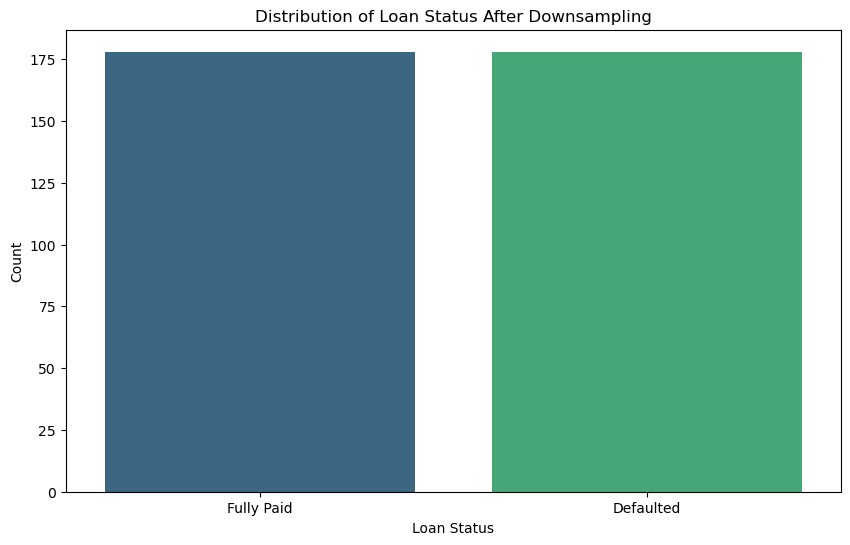

In [11]:
# Separate majority and minority classes
df_majority = data_filtered[data_filtered.loan_status_binary == 1]
df_minority = data_filtered[data_filtered.loan_status_binary == 0]
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
data_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(data_downsampled.loan_status_binary.value_counts())

# Plot the new counts
loan_status_counts_downsampled = data_downsampled['loan_status_binary'].value_counts().reset_index()
loan_status_counts_downsampled.columns = ['loan_status', 'count']
loan_status_counts_downsampled['loan_status'] = loan_status_counts_downsampled['loan_status'].map({1: 'Fully Paid', 0: 'Defaulted'})

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='count', data=loan_status_counts_downsampled, palette='viridis')
plt.title('Distribution of Loan Status After Downsampling')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()



**Note:** the value count changes from 1= 447,0 =178 to become, both 1 and 2 = 178 making the classes balanced.

In [12]:
print(data.columns)

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

The predictor variables indicate the factors that determine if a client will default or pay the loan they will be compaired to the target variable which is the loan status.

In [ ]:
X = data.drop('loan_status_binary',axis=1)
y = data['loan_status_binary']


Split the Data into Training and Testing Sets.I will be using a standard test_size 0f 20% and a random_state of 42

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions to ensure consistency
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


### Modeling
we will be trainning several machine learning models to predict loan repayment. Starting with the basic models like Logistic Regression and move on to more complex ones like Random Forest and Gradient Boosting.

In [ ]:
linreg = LinearRegression()

In [ ]:
# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

### Evaluate model performance

### Hyperparameter Tuning

In [ ]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest Report:\n", classification_report(y_test, y_pred_best_rf))
print("ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))


### Report findings